In [1]:
import pandas as pd

weather = pd.read_csv('weather.csv', sep = ';')

In [3]:
weather = weather.dropna()

In [5]:
filter_cisnienie = weather['CisnienieNaPoziomieMorza'] > 1050
weather = weather[~filter_cisnienie]

In [7]:
filter_temprosa = weather['TemperaturaPowietrza'] < weather['TemperaturaPunktuRosy']
weather = weather[~filter_temprosa]

In [9]:
weather['Data'] = pd.to_datetime(weather['Data'])

In [11]:
filter_datespri = weather.loc[((weather['Data'] >= '2017-03-21') & (weather['Data'] <= '2017-06-20')) |
                              ((weather['Data'] >= '2018-03-21') & (weather['Data'] <= '2018-06-20')) |
                              ((weather['Data'] >= '2019-03-21') & (weather['Data'] <= '2019-06-20')) |
                              ((weather['Data'] >= '2020-03-21') & (weather['Data'] <= '2020-06-20')) ]

filter_datesumm = weather.loc[((weather['Data'] >= '2017-06-21') & (weather['Data'] <= '2017-09-20')) |
                              ((weather['Data'] >= '2018-06-21') & (weather['Data'] <= '2018-09-20')) |
                              ((weather['Data'] >= '2019-06-21') & (weather['Data'] <= '2019-09-20')) |
                              ((weather['Data'] >= '2020-06-21') & (weather['Data'] <= '2020-09-20')) ]

filter_dateaut = weather.loc[((weather['Data'] >= '2017-09-21') & (weather['Data'] <= '2017-12-20')) |
                             ((weather['Data'] >= '2018-09-21') & (weather['Data'] <= '2018-12-20')) |
                             ((weather['Data'] >= '2019-09-21') & (weather['Data'] <= '2019-12-20')) |
                             ((weather['Data'] >= '2020-09-21') & (weather['Data'] <= '2020-12-20')) ]

filter_datewint = weather.loc[((weather['Data'] >= '2016-12-21') & (weather['Data'] <= '2017-03-20')) |
                              ((weather['Data'] >= '2017-12-21') & (weather['Data'] <= '2018-03-20')) |
                              ((weather['Data'] >= '2018-12-21') & (weather['Data'] <= '2019-03-20')) |
                              ((weather['Data'] >= '2019-12-21') & (weather['Data'] <= '2020-03-20')) |
                              ((weather['Data'] >= '2020-12-21') & (weather['Data'] <= '2021-03-20')) ]

In [12]:
filter_tempmin = weather['TemperaturaPowietrza'] < -20
filter_tempmax = weather['TemperaturaPowietrza'] > 35

filtrmax = filter_datespri.where(filter_tempmax).dropna()
weather = weather.drop(filtrmax.index)

filtrmin = filter_datespri.where(filter_tempmin).dropna()
weather = weather.drop(filtrmin.index)

In [14]:
filter_tempmin = weather['TemperaturaPowietrza'] < -5
filter_tempmax = weather['TemperaturaPowietrza'] > 40

filtrmax = filter_datesumm.where(filter_tempmax).dropna()
weather = weather.drop(filtrmax.index)

filtrmin = filter_datesumm.where(filter_tempmin).dropna()
weather = weather.drop(filtrmin.index)

In [15]:
filter_tempmin = weather['TemperaturaPowietrza'] < -20
filter_tempmax = weather['TemperaturaPowietrza'] > 32

filtrmax = filter_dateaut.where(filter_tempmax).dropna()
weather = weather.drop(filtrmax.index)

filtrmin = filter_dateaut.where(filter_tempmin).dropna()
weather = weather.drop(filtrmin.index)

In [17]:
filter_tempmin = weather['TemperaturaPowietrza'] < -27
filter_tempmax = weather['TemperaturaPowietrza'] > 22

filtrmax = filter_datewint.where(filter_tempmax).dropna()
weather = weather.drop(filtrmax.index)

filtrmin = filter_datewint.where(filter_tempmin).dropna()
weather = weather.drop(filtrmin.index)

In [21]:
filterplus = (weather['WysokoscPodstawyChmur'] >= 0) & (weather['Widzialnosc'] >= 0) & (weather['WielkoscZachmurzenia'] >= 0) & (weather['KierunekWiatru'] >= 0) & (weather['PredkoscWiatru'] >= 0) & (weather['CisnienieNaPoziomieMorza'] >= 0) & (weather['WysokoscOpadu'] >= 0) & (weather['OkresPomiaruOpadu'] >= 0)

weather = weather[filterplus]

In [23]:
filter_chmury = weather['WielkoscZachmurzenia'] > 8
weather = weather[~filter_chmury]

In [25]:
weather = weather.astype({"CzyDeszcz": bool, "CzyBurza": bool, "CzyMgla": bool,"CzyOpadMarznacy": bool, "CzySnieg": bool, "CzyPrzelotny": bool, "CzyZamiec": bool})

In [27]:
filter_wilgotnosc = weather['TemperaturaPunktuRosy'] < weather['TemperaturaPowietrza'] - 35
weather = weather[~filter_wilgotnosc]

In [29]:
weather.dtypes

Nazwa                               object
Wojewodztwo                         object
Szerokosc                          float64
Dlugosc                            float64
Data                        datetime64[ns]
godzina                             object
WysokoscPodstawyChmur                int64
Widzialnosc                          int64
WielkoscZachmurzenia                 int64
KierunekWiatru                     float64
PredkoscWiatru                       int64
TemperaturaPowietrza               float64
TemperaturaPunktuRosy              float64
CisnienieNaPoziomieMorza           float64
WysokoscOpadu                      float64
OkresPomiaruOpadu                    int64
CzyDeszcz                             bool
CzyBurza                              bool
CzyMgla                               bool
CzyOpadMarznacy                       bool
CzyPrzelotny                          bool
CzySnieg                              bool
CzyZamiec                             bool
dtype: obje

In [31]:
weather

,Nazwa,Wojewodztwo,Szerokosc,Dlugosc,Data,godzina,WysokoscPodstawyChmur,Widzialnosc,WielkoscZachmurzenia,KierunekWiatru,...,CisnienieNaPoziomieMorza,WysokoscOpadu,OkresPomiaruOpadu,CzyDeszcz,CzyBurza,CzyMgla,CzyOpadMarznacy,CzyPrzelotny,CzySnieg,CzyZamiec
0,Kołobrzeg,zachodniopomorskie,54.182823,15.580516,2017-01-01,00:00:00,0,0,0,200.0,...,1019.1,0.0,6,False,False,False,False,False,False,False
1,Koszalin,zachodniopomorskie,54.204928,16.156022,2017-01-01,00:00:00,50,1400,8,210.0,...,1019.4,0.0,0,False,False,False,False,False,False,False
2,Ustka,pomorskie,54.586395,16.854320,2017-01-01,00:00:00,100,1400,8,230.0,...,1017.8,0.1,6,False,False,False,False,False,False,False
3,Łeba,pomorskie,54.754190,17.532234,2017-01-01,00:00:00,50,2500,8,240.0,...,1017.1,0.0,0,False,False,False,False,False,False,False
4,Darłowo,zachodniopomorskie,54.420324,16.413144,2017-01-01,00:00:00,50,700,8,220.0,...,1018.7,0.0,6,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593274,Nowy Sącz,małopolskie,49.627062,20.689111,2020-12-31,23:00:00,0,3100,0,330.0,...,1009.8,0.0,0,False,False,False,False,False,False,False
2593275,Krosno,podkarpackie,49.703679,21.767720,2020-12-31,23:00:00,0,200,0,300.0,...,1009.4,0.0,0,False,False,False,False,False,True,False
2593276,Lesko,podkarpackie,49.467219,22.342615,2020-12-31,23:00:00,50,100,8,300.0,...,1008.9,0.0,0,False,False,False,False,False,True,False
2593277,Przemyśl,podkarpackie,49.799085,22.773792,2020-12-31,23:00:00,0,5000,0,270.0,...,1008.7,0.0,0,False,False,False,False,False,False,False


In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

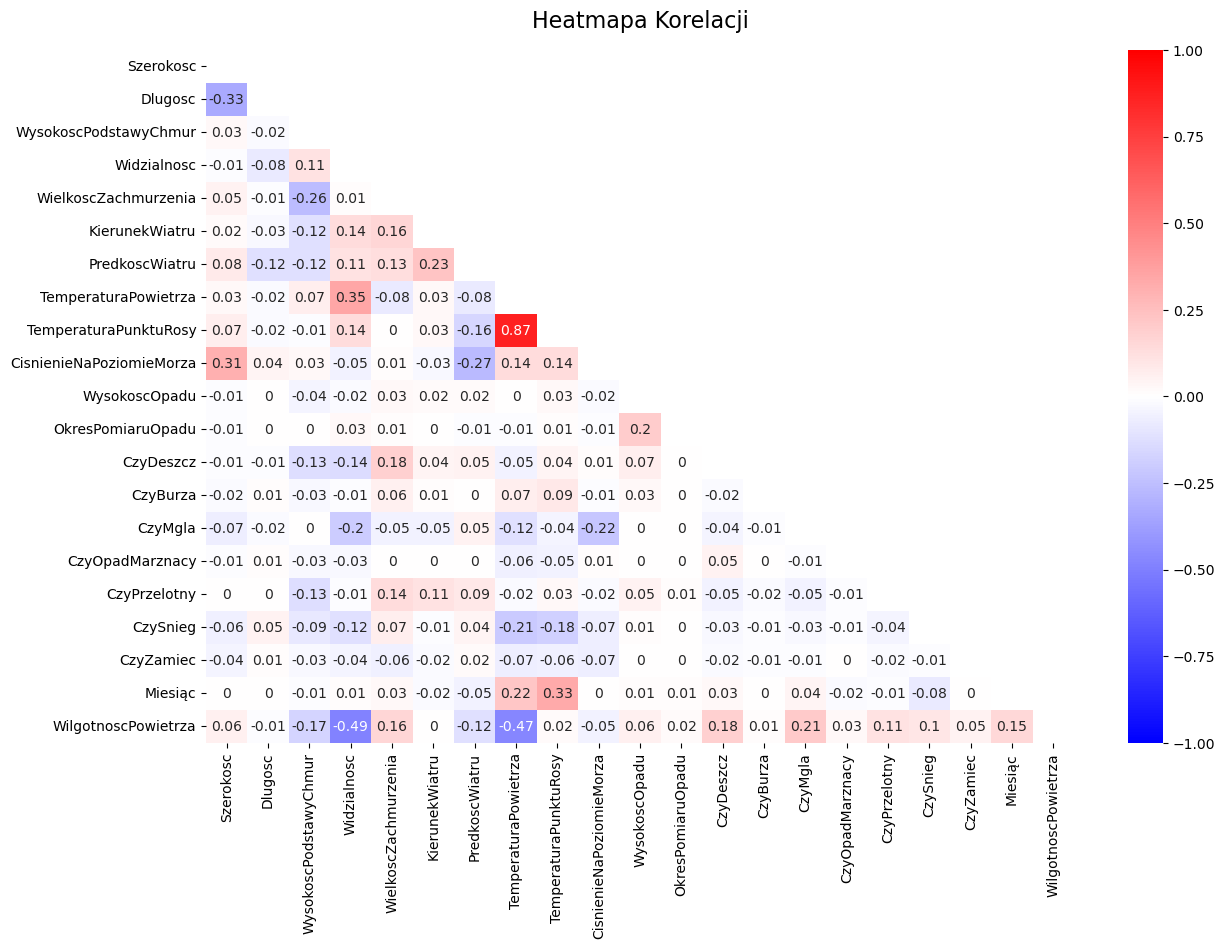

In [41]:
correlation_map = weather.corr(numeric_only=True).round(2).replace(-0.00, 0.00)

plt.figure(figsize=(14, 9))

mask = np.triu(np.ones_like(correlation_map, dtype=bool))
heatmap = sns.heatmap(correlation_map, mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr')
heatmap.set_title('Heatmapa Korelacji', fontdict={'fontsize':16}, pad=16);

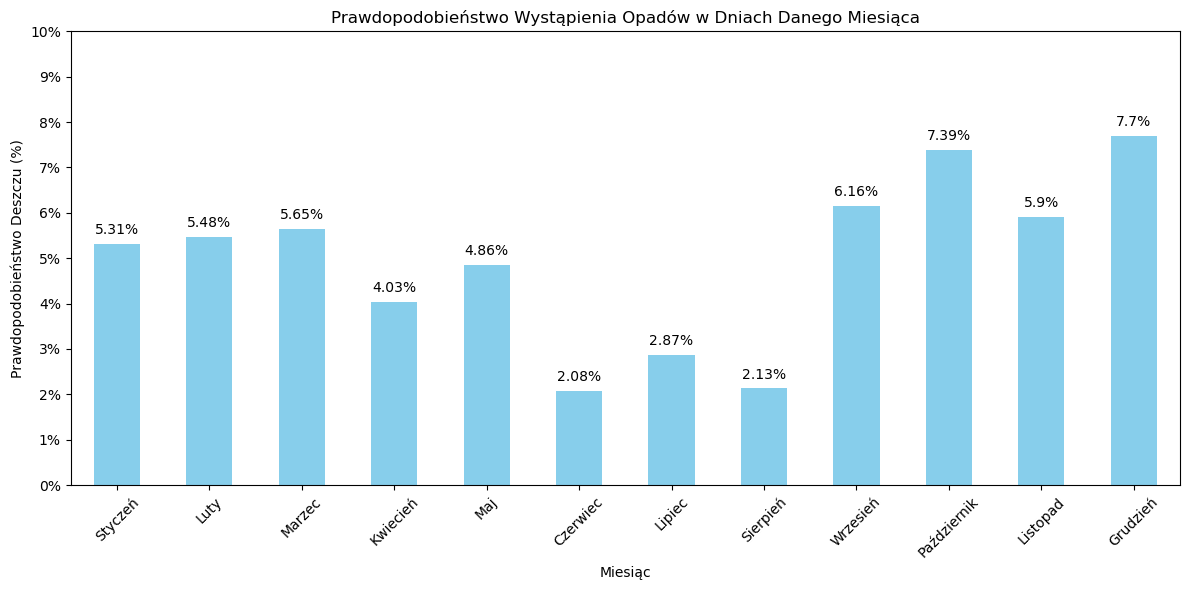

In [35]:
weather['Data'] = pd.to_datetime(weather['Data'])

# Dodanie kolumny z miesiącem
weather['Miesiąc'] = weather['Data'].dt.month

# Obliczenie średniego prawdopodobieństwa deszczu dla każdego miesiąca
average_rain_probability = weather.groupby('Miesiąc')['CzyDeszcz'].mean()

# Przekształcenie numerów miesięcy na nazwy
average_rain_probability.index = [
    'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
    'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'
]

# Ustawienie wykresu
plt.figure(figsize=(12, 6))
bars = average_rain_probability.plot(kind='bar', color='skyblue')
plt.title('Prawdopodobieństwo Wystąpienia Opadów w Dniach Danego Miesiąca')
plt.xlabel('Miesiąc')
plt.ylabel('Prawdopodobieństwo Deszczu (%)')
plt.xticks(rotation=45)

# Formatowanie osi Y na procenty w zakresie 0% do 20%
ax = plt.gca()  # Pobranie obecnej osi
ax.set_yticks(np.arange(0, 0.11, 0.01))  # Skala Y (0% do 10%)
ax.set_yticklabels([f'{int(y * 100)}%' for y in ax.get_yticks()])  # Zamiana na procenty

# Dodanie wartości na słupkach
for bar in bars.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{round(height*100, 2)}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Przesunięcie o 5 jednostek powyżej słupka
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Dostosowanie układu
plt.show()

In [37]:
# Funkcja wektorowa do obliczenia ciśnienia pary nasyconej przy danej temperaturze
def cisnienie_pary(T):
    return 6.112 * np.exp(17.62 * T / (243.12 + T))

# Obliczenie ciśnienia pary nasyconej przy temperaturze punktu rosy i temperaturze powietrza
e_td = cisnienie_pary(weather['TemperaturaPunktuRosy'])
e_t = cisnienie_pary(weather['TemperaturaPowietrza'])

# Obliczenie wilgotności względnej jako nowa kolumna w DataFrame
weather['WilgotnoscPowietrza'] = 100 * (e_td / e_t)

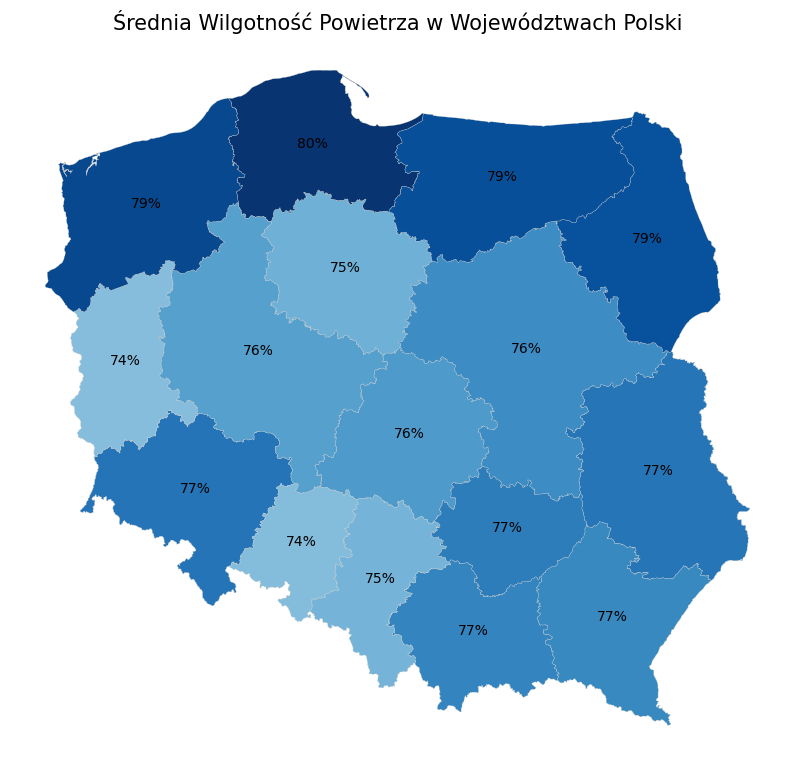

In [39]:
import geopandas as gpd

# Wczytanie pliku .shp
wojewodztwa_geo = gpd.read_file('F:\\Users\\Desktop\\gadm41_POL_shp\\gadm41_POL_1.shp')

average_humidity = weather.groupby('Wojewodztwo')['WilgotnoscPowietrza'].mean().reset_index()

# Ujednolicenie wielkości liter w kolumnach
wojewodztwa_geo['NAME_1'] = wojewodztwa_geo['NAME_1'].str.lower()  # Przykład: 'województwo'
average_humidity['Wojewodztwo'] = average_humidity['Wojewodztwo'].str.lower()  # Przykład: 'województwo'

# Połączenie danych o wilgotności z geometrią województw
map_data = wojewodztwa_geo.merge(average_humidity, left_on='NAME_1', right_on='Wojewodztwo')

# Zmiana CRS na odpowiedni projektowany CRS (np. EPSG:2180)
map_data = map_data.to_crs(epsg=2180)

# Rysowanie mapy
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

map_data.plot(column='WilgotnoscPowietrza', cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.8', legend=False, 
               vmin=70, vmax=80)  # Ustawienie min i max dla koloru

# Dodawanie etykiet do wykresu z zaokrągleniem do całości
for x, y, label in zip(map_data.geometry.centroid.x, map_data.geometry.centroid.y, map_data['WilgotnoscPowietrza']):
    ax.text(x, y, f'{round(label)}%', fontsize=10, ha='center', color='black')  # Zaokrąglenie do najbliższej całości

ax.set_title('Średnia Wilgotność Powietrza w Województwach Polski', fontsize=15)
ax.set_axis_off()  # Ukrycie osi

plt.show()
